In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
cars=pd.read_csv('car-data.csv')

In [3]:
cars.head()

year  price transmission  mileage fuelType  tax   mpg  engineSize
0  2019  25000    Automatic    13904   Diesel  145  49.6         2.0
1  2019  26883    Automatic     4562   Diesel  145  49.6         2.0
2  2019  20000       Manual     7414   Diesel  145  50.4         2.0
3  2019  33492    Automatic     4825   Petrol  145  32.5         2.0
4  2019  22900    Semi-Auto     6500   Petrol  150  39.8         1.5

In [4]:
cars.shape

(15157, 8)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          15157 non-null  int64  
 1   price         15157 non-null  int64  
 2   transmission  15157 non-null  object 
 3   mileage       15157 non-null  int64  
 4   fuelType      15157 non-null  object 
 5   tax           15157 non-null  int64  
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 947.4+ KB


In [6]:
cars.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
cars.describe()

year         price        mileage           tax           mpg  \
count  15157.000000  15157.000000   15157.000000  15157.000000  15157.000000   
mean    2017.255789  16838.952365   22092.785644    112.744277     53.753355   
std        2.053059   7755.015206   21148.941635     63.482617     13.642182   
min     2000.000000    899.000000       1.000000      0.000000      0.300000   
25%     2016.000000  10990.000000    5962.000000     30.000000     46.300000   
50%     2017.000000  15497.000000   16393.000000    145.000000     53.300000   
75%     2019.000000  20998.000000   31824.000000    145.000000     60.100000   
max     2020.000000  69994.000000  212000.000000    580.000000    188.300000   

         engineSize  
count  15157.000000  
mean       1.600693  
std        0.461695  
min        0.000000  
25%        1.200000  
50%        1.600000  
75%        2.000000  
max        3.200000

In [8]:
cars.corr()

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.614748 -0.762574  0.365796 -0.297173    0.004957
price       0.614748  1.000000 -0.517599  0.482964 -0.496844    0.575139
mileage    -0.762574 -0.517599  1.000000 -0.330231  0.328949    0.110513
tax         0.365796  0.482964 -0.330231  1.000000 -0.518440    0.291077
mpg        -0.297173 -0.496844  0.328949 -0.518440  1.000000   -0.277009
engineSize  0.004957  0.575139  0.110513  0.291077 -0.277009    1.000000

<AxesSubplot:>

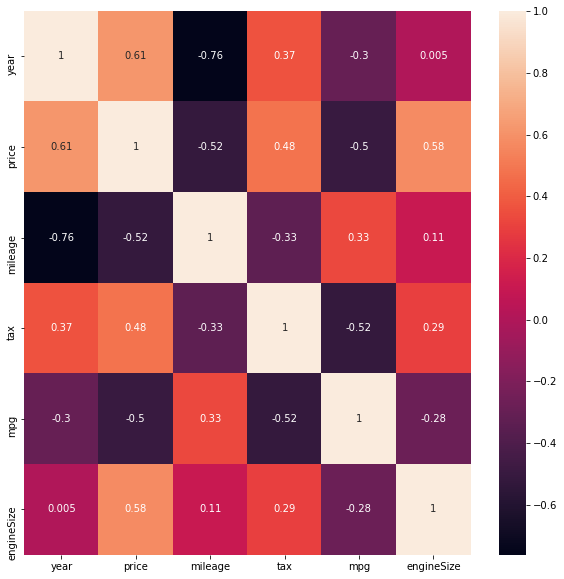

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(cars.corr(), annot=True)

In [10]:
cars.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<AxesSubplot:xlabel='fuelType', ylabel='count'>

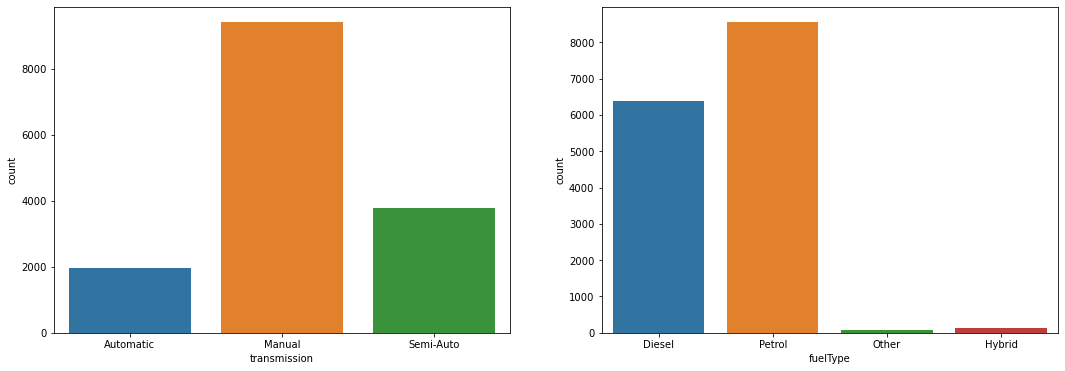

In [11]:

fig = plt.figure(figsize=(18,6))
fig.add_subplot(1,2,1)
sns.countplot(cars['transmission'])
fig.add_subplot(1,2,2)
sns.countplot(cars['fuelType'])

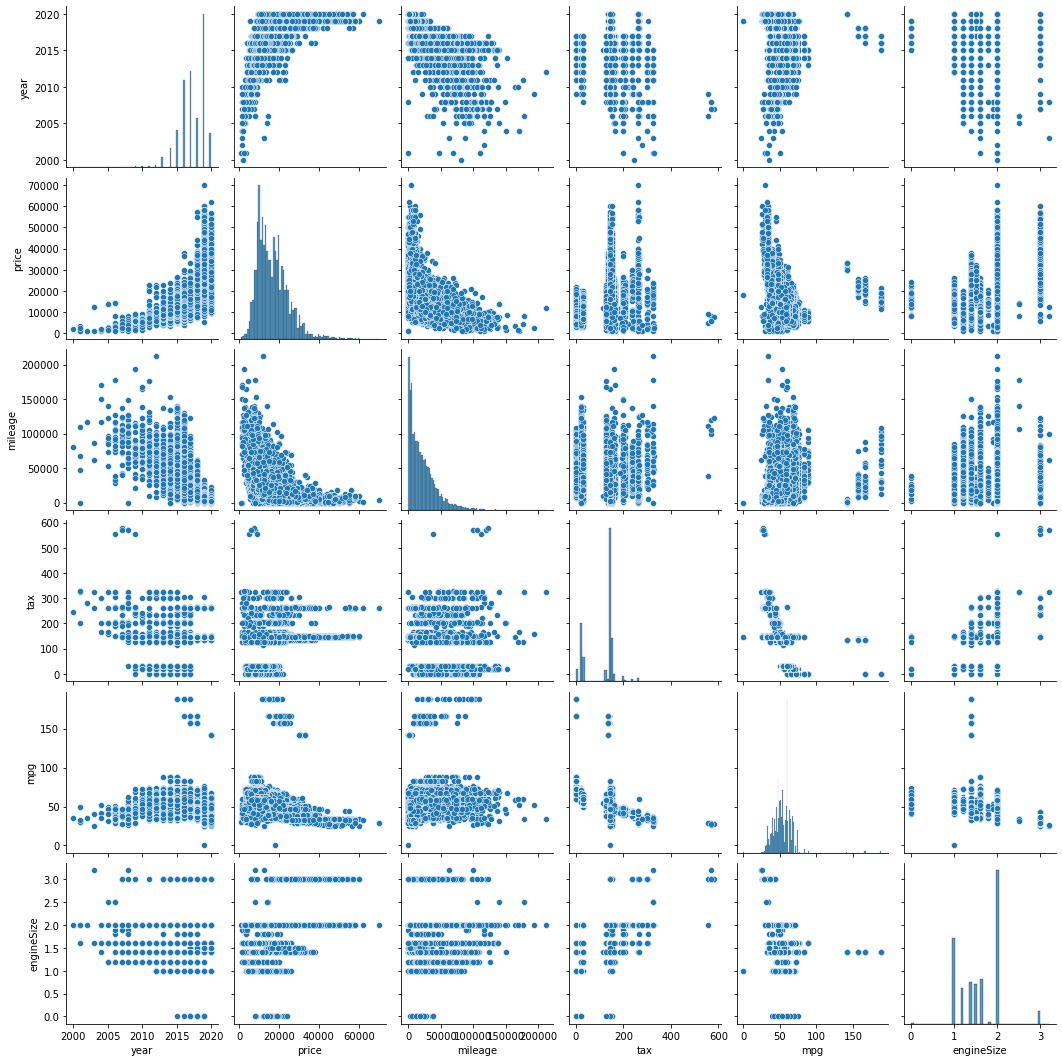

In [12]:
sns.pairplot(data=cars, palette="husl")

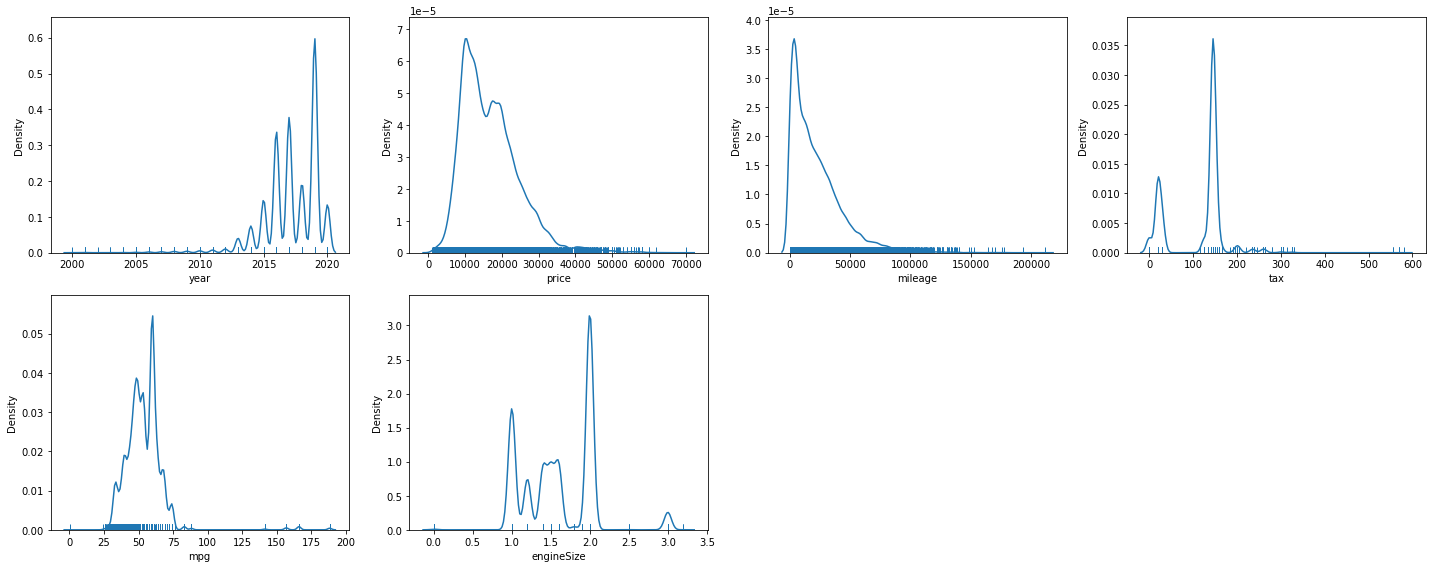

In [13]:
num_cols = cars.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,8))

for col in range(len(num_cols.columns)):
    fig.add_subplot(2,4,col+1)
    sns.distplot(num_cols.iloc[:,col], hist=False, rug=True, kde_kws={'bw':0.1}, label='UV')
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()

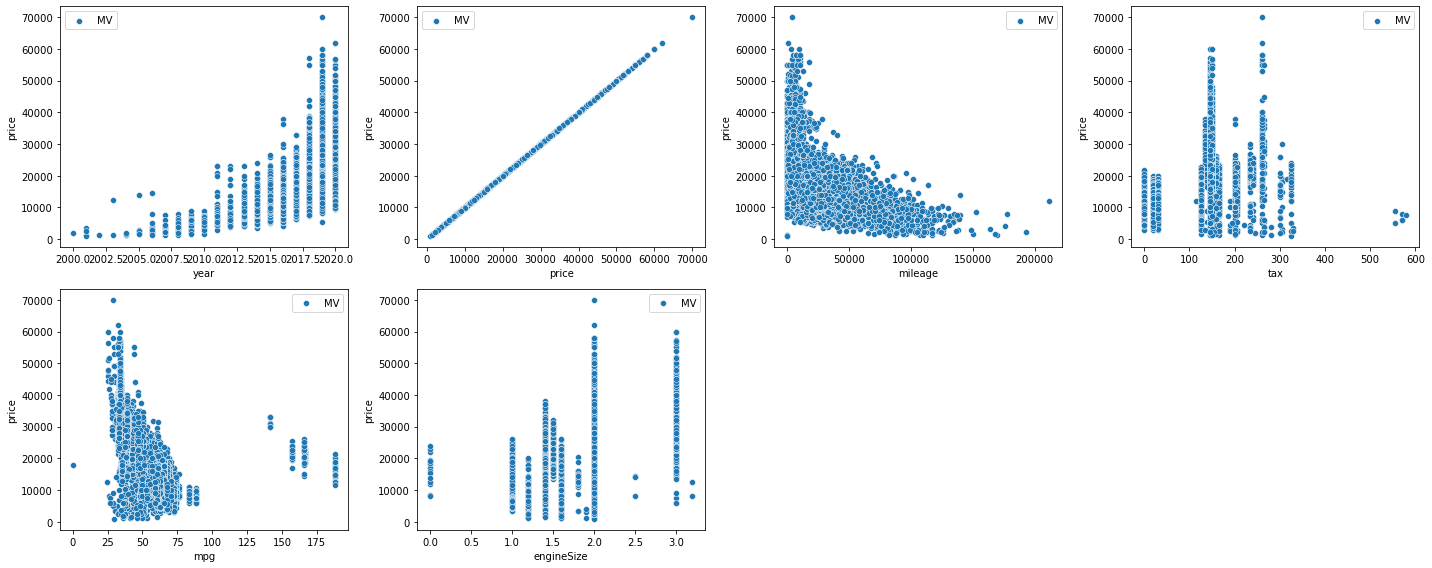

In [14]:
num_cols = cars.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,8))

for col in range(len(num_cols.columns)):
    fig.add_subplot(2,4,col+1)
    sns.scatterplot(x=num_cols.iloc[:,col], y=cars['price'], label='MV')
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()


In [15]:
cars2 =pd.get_dummies(cars, columns= ['transmission', 'fuelType'])

In [16]:
cars2

year  price  mileage  tax   mpg  engineSize  transmission_Automatic  \
0      2019  25000    13904  145  49.6         2.0                       1   
1      2019  26883     4562  145  49.6         2.0                       1   
2      2019  20000     7414  145  50.4         2.0                       0   
3      2019  33492     4825  145  32.5         2.0                       1   
4      2019  22900     6500  150  39.8         1.5                       0   
...     ...    ...      ...  ...   ...         ...                     ...   
15152  2012   5990    74000  125  58.9         2.0                       0   
15153  2008   1799    88102  145  46.3         1.2                       0   
15154  2009   1590    70000  200  42.0         1.4                       0   
15155  2006   1250    82704  150  46.3         1.2                       0   
15156  2007   2295    74000  145  46.3         1.2                       0   

       transmission_Manual  transmission_Semi-Auto  fuelType_Diesel  \
0                        0                       0                1   
1                        0                       0                1   
2                        1                       0                1   
3                        0                       0                0   
4                        0                       1                0   
...                    ...                     ...              ...   
15152                    1                       0                1   
15153                    1                       0                0   
15154                    1                       0                0   
15155                    1                       0                0   
15156                    1                       0                0   

       fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
0                    0               0                0  
1                    0               0                0  
2                    0               0                0  
3                    0               0                1  
4                    0               0                1  
...                ...             ...              ...  
15152                0               0                0  
15153                0               0                1  
15154                0               0                1  
15155                0               0                1  
15156                0               0                1  

[15157 rows x 13 columns]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
X = cars2.drop(['price'], axis=1)
y = cars2['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) 

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([18450.61919408, 10810.38856507, 19186.01961924, ...,
       10440.98154514, 18546.55809354, 23709.18461826])

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso

In [23]:
log_clf=LinearRegression()
rnd_clf = RandomForestRegressor()
rid_clf = Ridge(alpha=2,max_iter=1000,random_state=1)
ele_clf = ElasticNet()
gbr_clf=GradientBoostingRegressor()
lss_clf=Lasso(alpha = 500)

In [24]:
voting_clf = VotingRegressor([('lr', log_clf), ('rf', rnd_clf), ('rnd', rnd_clf), ('ele', ele_clf), ('gbr', gbr_clf), ('lss', lss_clf)])
voting_clf.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('rnd', RandomForestRegressor()),
                            ('ele', ElasticNet()),
                            ('gbr', GradientBoostingRegressor()),
                            ('lss', Lasso(alpha=500))])

In [25]:
for clf in (log_clf, rnd_clf, rid_clf, voting_clf,ele_clf, gbr_clf,lss_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'r2_score', r2_score(y_test, y_pred))

LinearRegression r2_score 0.795646379731728
RandomForestRegressor r2_score 0.9387322007266901
Ridge r2_score 0.7955662661559264
VotingRegressor r2_score 0.8912777578974581
ElasticNet r2_score 0.6732826648134399
GradientBoostingRegressor r2_score 0.912278463303702
Lasso r2_score 0.7363930578850859


In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=7)

In [ ]:
voting_clf2 = VotingRegressor([('lr', log_clf), ('rf', rnd_clf), ('rnd', rnd_clf), ('ele', ele_clf), ('gbr', gbr_clf),('lss', lss_clf)])
voting_clf.fit(X_train, y_train)

In [ ]:
for clf in (log_clf, rnd_clf, rid_clf, voting_clf2,ele_clf, gbr_clf,lss_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'r2_score', r2_score(y_test, y_pred))

In [ ]:
# min max scaller didnt add any vlaue to the result 

In [ ]:
scaler2 = StandardScaler()
X_scaled2 = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, test_size=0.2, random_state=7)

In [ ]:
voting_clf3 = VotingRegressor([('lr', log_clf), ('rf', rnd_clf), ('rnd', rnd_clf), ('ele', ele_clf), ('gbr', gbr_clf),('lss', lss_clf)])
voting_clf.fit(X_train, y_train)

In [ ]:
for clf in (log_clf, rnd_clf, rid_clf, voting_clf3,ele_clf, gbr_clf,lss_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'r2_score', r2_score(y_test, y_pred))

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 10, n_estimators = 100)
model.fit(X_train, y_train)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
result = model.score(X_test, y_test)

print("Accuracy : {}".format(result))

In [ ]:
model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()